In [91]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

# Creating distance array


<img src="./tsp-nodes.jpg"/>

We Create a markup table with all distances. <br/>
Since We have only bottom part
<img src="./unknown.png"/>
We need to add a mirror copy like above

In [92]:
f = open('data/eil76.txt','r')
string = ""
arrayTSP = []
index = int(f.readline())
for i in range(index):
    line = f.readline()
    row = line.split(' ')[:-1]
    arrayTSP.append(row)
    
    for ii, val in enumerate(row):
        if(val is not '0'):
            arrayTSP[ii].append(val)

    string += line

f.close()

# Creating City Array

In [93]:
class City:
    def __init__(self, index, x, y):
        self.x = float(x)
        self.y = float(y)
        self.index = int(index)-1
    


In [94]:
string = ""
citiesPop = []
with open('data/eil76.tsp', 'r') as f:
    lines = f.readlines()[6:-1]
    for i in range(index):
        line = lines[i]
        strippedArr = line.strip().split(' ')
        row =  [x for x in strippedArr if x]
        citiesPop.append(City(row[0], row[1], row[2].replace('\n','')))

f.close()


In [95]:
def calculateDistance(population, cities):
    distance = 0
    for i, val in enumerate(population):
        if(i != len(population)-1):
            currentCityIndex = population[i].index
            nextCityIndex = population[i+1].index
            distance += float(cities[currentCityIndex][nextCityIndex])
    return distance

print(calculateDistance(citiesPop, arrayTSP))

1944.0


In [123]:
# Generate population
class OrderOfPopulation():
    sum = 0
    def __init__(self, population, cities):
        self.cities = cities
        self.population = population
        distance = self.calculateDistance(population)
        self.distance = distance
        self.fitness = self.calculateFitness(distance)
        
    def calculateFitness(self, distance):
        #our score is distance which less means better thats why we divide it 
        return 1/distance
    
    def calculateDistance(self, population):
        distance = 0
        for i, val in enumerate(population):
            if(i != len(population)-1):
                currentCityIndex = population[i].index
                nextCityIndex = population[i+1].index
                distance += float(self.cities[currentCityIndex][nextCityIndex])
        return distance
    
    def setProb(self, sum):
        self.prob = self.fitness / sum

    def setDistance(self, distance):
        self.distance = distance


# Creating 1st population

In [125]:
def getPopulation(cities, iteration):
    population = []
    for i in range(iteration):
        np.random.shuffle(cities)
        p = OrderOfPopulation(cities, arrayTSP)
        
        population.append(p)
    return population;

# we set how many random city configuration will be in the population
numberOfPopulation = 100
cityPopulation = getPopulation(citiesPop, numberOfPopulation)

# set probability (normalize fitness score)
# so we have values in between 0-1 
sum = 0
for i, val in enumerate(cityPopulation):
    sum = sum + val.fitness
print(sum)

sumProb = 0
for i, val in enumerate(cityPopulation):
    val.setProb(sum)
    sumProb = sumProb + val.prob
    
print(sumProb)

0.04024709888011
0.9999999999999998


# Finding the best Individual in the population after 1st population

In [97]:
bestPopulation = None
bestDistance = 0

def getBestFitnessScore(population):
    global bestDistance
    global bestPopulation

    for i, val in enumerate(population):
        if(bestPopulation == None or bestDistance > population[i].distance):
            bestDistance = population[i].distance
            bestPopulation = population[i]
    
    return bestPopulation
    

bestPopulation = getBestFitnessScore(cityPopulation)

print(bestPopulation.distance)

2161.0


In [98]:
# picks number randomly  but with different probability for each element
def pickOne(list, prob):
    index = 0
    r = random.uniform(0, 1)
    while(r > 0.99):
        r = r - prob
        index+=1
    index-=1
    return list[index]

In [99]:
def swap(list, indexA, indexB):
    tempA = list[indexA]
    list[indexA] = list[indexB]
    list[indexB] = tempA

In [126]:
def mutate(order):
    indexA = math.floor(np.random.uniform(0, len(order)))
    indexB = math.floor(np.random.uniform(0, len(order)))
    swap(order, indexA, indexB)
    

# Crossover

##### Typical crossover looks like this
We take half of <b>parentA</b> and 2nd half of <b>parentB</b>, and We combine them

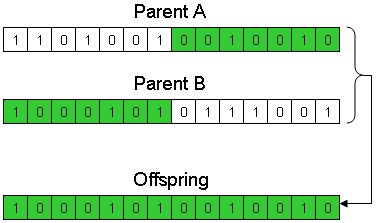

In [114]:
Image(filename='crossover2.jpg')

 Our crossover takes half of <b>parentA</b> and fills rest of the offspring with <b>parentB</b> that didn't occured in array. <br>
 We do it because every element is unique so We can't have duplicates


In [127]:
def crossover(orderA, orderB):
    indexOfHalf = math.floor(len(orderA)/2)
    partOfA = orderA[0:indexOfHalf]
    partOfB = []
    for i in orderB:
        if i not in partOfA:
            partOfB.append(i)
    return partOfA + partOfB

In [128]:
def newGeneration(orders):
    global arrayTSP
    global sum
    newOrders = []
    for i, citiesOrder in enumerate(orders):
        orderA = pickOne(orders, citiesOrder.prob)
        orderB = pickOne(orders, citiesOrder.prob)
        mixedOrder = crossover(orderA.population, orderB.population)
        mutate(mixedOrder)
        p = OrderOfPopulation(mixedOrder, arrayTSP)
        p.setProb(sum)
        newOrders.append(p)
    return newOrders

# Create new generation 

In [130]:
numberOfGenerations = 500
for i in range(numberOfGenerations):
    cityPopulation = newGeneration(cityPopulation)
    bestPopulation = getBestFitnessScore(cityPopulation)
    

# Finding the best Individual in the population after creating new Generation

In [131]:
bestPopulation = getBestFitnessScore(cityPopulation)
print(bestPopulation.distance)

2046.0


# Visualizing best path

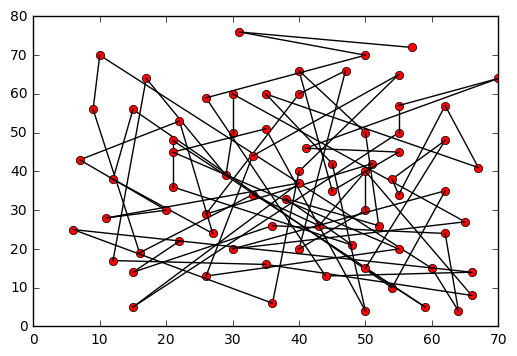

In [106]:
import matplotlib.pyplot as plt

# display all cities
def displayBestPopulation():
    for i, city in enumerate(bestPopulation.population):
        plt.plot(city.x, city.y, 'ro-')
        if (i+1) <= (len(bestPopulation.population)-1):
            nextCity = bestPopulation.population[i+1];
            plt.plot([city.x, nextCity.x],[city.y,nextCity.y],'k-')

    plt.show()
displayBestPopulation()